In [2]:
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('/Users/lfarias/Desktop/Renner/Renner-ML/input/clean_data/renner_web_treino.csv')

In [8]:
df['data_semana_comercial'] = pd.to_datetime(df['data_semana_comercial'])

In [9]:
display(df)

,cod_loja,data_semana_comercial,venda
0,407,2022-06-05,188
1,407,2021-05-23,136
2,406,2021-05-30,926
3,407,2022-04-03,152
4,407,2022-07-24,33
...,...,...,...
401,406,2017-05-14,255
402,407,2021-11-28,31
403,406,2020-04-26,564
404,406,2020-11-01,1819


In [10]:
X = df['data_semana_comercial']
y = df['venda']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
X_train.head()

216   2018-12-23
31    2019-11-17
333   2021-09-12
255   2017-06-25
45    2022-04-10
Name: data_semana_comercial, dtype: datetime64[ns]

In [13]:
y_train.head()

216     78
31     487
333     30
255     78
45     513
Name: venda, dtype: int64

In [14]:
import statsmodels.api as sm

In [24]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train.astype(float), X_train_sm.astype(float)).fit()

TypeError: Cannot cast DatetimeArray to dtype float64

In [21]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const                    1.932077e-34
data_semana_comercial    3.063750e-16
dtype: float64

In [22]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  venda   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 06 Jun 2023   Prob (F-statistic):                nan
Time:                        18:07:47   Log-Likelihood:                -2290.1
No. Observations:                 284   AIC:                             4582.
Df Residuals:                     283   BIC:                             4586.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.932e-

TypeError: cannot perform __rmul__ with this index type: DatetimeArray

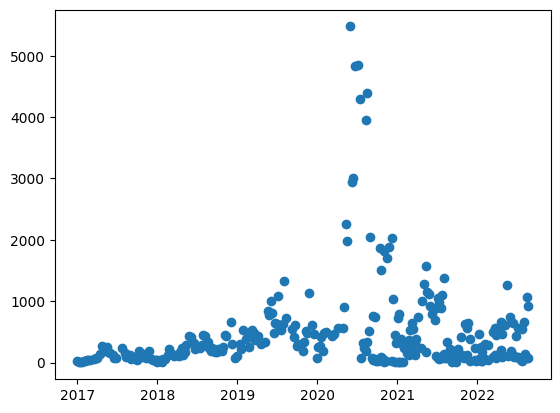

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()